In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('//content/gdrive/My Drive/Colab Notebooks/')

In [0]:
#export
from exp.nb_07a import *

In [3]:
datasets.URLs.IMAGENETTE_160

'https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160'

In [4]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE_160)
path

PosixPath('/root/.fastai/data/imagenette-160')

In [0]:
#export
import PIL,os,mimetypes
Path.ls = lambda x: list(x.iterdir())

In [6]:
path.ls()

[PosixPath('/root/.fastai/data/imagenette-160/val'),
 PosixPath('/root/.fastai/data/imagenette-160/train')]

In [7]:
(path/'val').ls()

[PosixPath('/root/.fastai/data/imagenette-160/val/n03888257'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03028079'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03417042'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03000684'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03394916'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n02979186'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n02102040'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03425413'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03445777')]

In [0]:
path_tench = path/'val'/'n01440764'

In [9]:
img_fn = path_tench.ls()[0]
img_fn

PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00045866.JPEG')

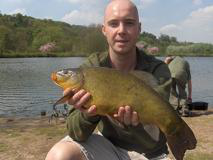

In [10]:
img = PIL.Image.open(img_fn)
img

In [0]:
import numpy
imga = numpy.array(img)

In [12]:
imga.shape

(160, 213, 3)

In [13]:
imga[:10,:10,0]

array([[193, 194, 195, 196, ..., 200, 200, 205, 205],
       [193, 194, 195, 196, ..., 199, 199, 202, 202],
       [192, 192, 194, 196, ..., 196, 198, 197, 198],
       [191, 192, 193, 194, ..., 195, 195, 193, 196],
       ...,
       [188, 188, 191, 191, ..., 190, 190, 190, 190],
       [187, 188, 188, 191, ..., 189, 190, 188, 188],
       [192, 187, 190, 191, ..., 197, 192, 186, 193],
       [195, 197, 194, 190, ..., 188, 182, 196, 191]], dtype=uint8)

In [0]:
#export
image_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('image/'))

In [15]:
' '.join(image_extensions)

'.pgm .tiff .djv .crw .cdr .cpt .djvu .cdt .pbm .ppm .ico .ras .nef .xpm .pat .svg .jpm .jpe .png .ief .jpf .wbmp .gif .bmp .xwd .cr2 .pcx .jng .jpx .pnm .jp2 .jpg .orf .jpeg .rgb .psd .art .xbm .svgz .tif .erf .jpg2'

In [0]:
#export
def setify(o): return o if isinstance(o,set) else set(listify(o))

In [0]:
#test_eq(setify('aa'), {'aa'})
test_eq(setify(['aa',1]), {'aa',1})
test_eq(setify(None), set())
test_eq(setify(1), {1})
test_eq(setify({1}), {1})

In [0]:
#export
def _get_files(p, fs, extensions=None):
    p = Path(p)
    res = [p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

In [0]:
t = [o.name for o in os.scandir(path_tench)]
t = _get_files(path/'val',t,extensions=image_extensions)

In [20]:
t[:5]

[PosixPath('/root/.fastai/data/imagenette-160/val/ILSVRC2012_val_00045866.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/ILSVRC2012_val_00037596.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/ILSVRC2012_val_00046499.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/ILSVRC2012_val_00031333.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/ILSVRC2012_val_00002138.JPEG')]

In [0]:
#export
def get_files(path, extensions=None, recurse=False, include=None):
    path = Path(path)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}
    if recurse:
        res = []
        for i,(p,d,f) in enumerate(os.walk(path)): # returns (dirpath, dirnames, filenames)
            if include is not None and i==0: d[:] = [o for o in d if o in include]
            else:                            d[:] = [o for o in d if not o.startswith('.')]
            res += _get_files(p, f, extensions)
        return res
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, f, extensions)

In [22]:
get_files(path_tench,image_extensions)[:3]

[PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00045866.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00037596.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00046499.JPEG')]

In [23]:
get_files(path,image_extensions, recurse=True)[:3]

[PosixPath('/root/.fastai/data/imagenette-160/val/n03888257/ILSVRC2012_val_00041925.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03888257/ILSVRC2012_val_00022496.JPEG'),
 PosixPath('/root/.fastai/data/imagenette-160/val/n03888257/ILSVRC2012_val_00041706.JPEG')]

In [24]:
all_fns = get_files(path,image_extensions, recurse=True)
len(all_fns)

13394

In [25]:
%timeit -n 10 get_files(path,image_extensions, recurse=True)

10 loops, best of 3: 79.9 ms per loop


## prepare for modeling

### get files

In [0]:
#export
def compose(x, funcs, *args, order_key='_order', **kwargs):
    key = lambda o: getattr(o, order_key, 0)
    for f in sorted(listify(funcs), key=key): x = f(x, **kwargs)
    return x

class ItemList(ListContainer):
    def __init__(self, items, path='.', tfms=None):
        super().__init__(items)
        self.path,self.tfms = Path(path),tfms

    def __repr__(self): return f'{super().__repr__()}\nPath: {self.path}'
    
    def new(self, items, cls=None):
        if cls is None: cls=self.__class__
        return cls(items, self.path, tfms=self.tfms)
    
    def  get(self, i): return i
    def _get(self, i): return compose(self.get(i), self.tfms)
    
    def __getitem__(self, idx):
        res = super().__getitem__(idx)
        if isinstance(res,list): return [self._get(o) for o in res]
        return self._get(res)

class ImageList(ItemList):
    @classmethod
    def from_files(cls, path, extensions=None, recurse=True, include=None, **kwargs):
        if extensions is None: extensions = image_extensions
        return cls(get_files(path, extensions, recurse=recurse, include=include), path, **kwargs)
    
    def get(self, fn): return PIL.Image.open(fn)

In [0]:
#export
class Transform(): _order=0

class MakeRGB(Transform):
    def __call__(self, item): return item.convert('RGB')

def make_rgb(item): return item.convert('RGB')

In [0]:
il = ImageList.from_files(path,tfms=make_rgb)

In [29]:
il

ImageList (13394 items)
[PosixPath('/root/.fastai/data/imagenette-160/val/n03888257/ILSVRC2012_val_00041925.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03888257/ILSVRC2012_val_00022496.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03888257/ILSVRC2012_val_00041706.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03888257/ILSVRC2012_val_00018509.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03888257/ILSVRC2012_val_00047778.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03888257/ILSVRC2012_val_00030583.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03888257/ILSVRC2012_val_00026575.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03888257/ILSVRC2012_val_00047147.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03888257/ILSVRC2012_val_00023107.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/val/n03888257/ILSVRC2012_val_00013527.JPEG')...]
Path: /root/.fastai/data/imagenette-160

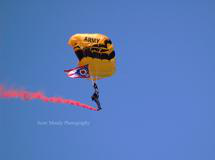

In [30]:
il[1]

In [31]:
il[:2]

[<PIL.Image.Image image mode=RGB size=160x160 at 0x7F188A9CDC88>,
 <PIL.Image.Image image mode=RGB size=215x160 at 0x7F188A9C5940>]

### split validation set

In [32]:
fn = il.items[0];fn

PosixPath('/root/.fastai/data/imagenette-160/val/n03888257/ILSVRC2012_val_00041925.JPEG')

In [33]:
fn.parent.parent.name

'val'

In [0]:
#export
def grandparent_splitter(fn, valid_name='valid', train_name='train'):
    gp = fn.parent.parent.name
    return True if gp==valid_name else False if gp==train_name else None

def split_by_func(items, f):
    mask = [f(o) for o in items]
    # `None` values will be filtered out
    f = [o for o,m in zip(items,mask) if m==False]
    t = [o for o,m in zip(items,mask) if m==True ]
    return f,t

In [0]:
splitter = partial(grandparent_splitter,valid_name='val')

In [36]:
%time train,valid = split_by_func(il,splitter)

CPU times: user 45 ms, sys: 980 µs, total: 46 ms
Wall time: 50.6 ms


In [37]:
len(train),len(valid)

(12894, 500)

In [0]:
#export
class SplitData():
    def __init__(self, train, valid): self.train,self.valid = train,valid
        
    def __getattr__(self,k): return getattr(self.train,k)
    #This is needed if we want to pickle SplitData and be able to load it back without recursion errors
    def __setstate__(self,data:Any): self.__dict__.update(data) 
    
    @classmethod
    def split_by_func(cls, il, f):
        lists = map(il.new, split_by_func(il.items, f))
        return cls(*lists)

    def __repr__(self): return f'{self.__class__.__name__}\nTrain: {self.train}\nValid: {self.valid}\n'

In [39]:
sd = SplitData.split_by_func(il, splitter); sd

SplitData
Train: ImageList (12894 items)
[PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_49674.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_32001.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_20704.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_8415.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_6395.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_8193.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_19580.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_9456.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_11609.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_19702.JPEG')...]
Path: /root/.fastai/data/imagenette-160
Valid: ImageList (500 items)
[PosixPath('/root/.fastai/data/imagenett

### labeling

In [0]:
#export
from collections import OrderedDict

def uniqueify(x, sort=False):
  res = list(OrderedDict.fromkeys(x).keys())
  if sort: res.sort()
  return res

In [0]:
#export
class Processor(): 
    def process(self, items): return items

class CategoryProcessor(Processor):
    def __init__(self): self.vocab=None
    
    def __call__(self, items):
        #The vocab is defined on the first use.
        if self.vocab is None:
            self.vocab = uniqueify(items)
            self.otoi  = {v:k for k,v in enumerate(self.vocab)}
        return [self.proc1(o) for o in items]
    def proc1(self, item):  return self.otoi[item]
    
    def deprocess(self, idxs):
        assert self.vocab is not None
        return [self.deproc1(idx) for idx in idxs]
    def deproc1(self, idx): return self.vocab[idx]

In [0]:
#export
def parent_labeler(fn): return fn.parent.name

def _label_by_func(ds, f, cls=ItemList): return cls([f(o) for o in ds.items], path=ds.path)

#This is a slightly different from what was seen during the lesson,
#   we'll discuss the changes in lesson 11
class LabeledData():
    def process(self, il, proc): return il.new(compose(il.items, proc))

    def __init__(self, x, y, proc_x=None, proc_y=None):
        self.x,self.y = self.process(x, proc_x),self.process(y, proc_y)
        self.proc_x,self.proc_y = proc_x,proc_y
        
    def __repr__(self): return f'{self.__class__.__name__}\nx: {self.x}\ny: {self.y}\n'
    def __getitem__(self,idx): return self.x[idx],self.y[idx]
    def __len__(self): return len(self.x)
    
    def x_obj(self, idx): return self.obj(self.x, idx, self.proc_x)
    def y_obj(self, idx): return self.obj(self.y, idx, self.proc_y)
    
    def obj(self, items, idx, procs):
        isint = isinstance(idx, int) or (isinstance(idx,torch.LongTensor) and not idx.ndim)
        item = items[idx]
        for proc in reversed(listify(procs)):
            item = proc.deproc1(item) if isint else proc.deprocess(item)
        return item

    @classmethod
    def label_by_func(cls, il, f, proc_x=None, proc_y=None):
        return cls(il, _label_by_func(il, f), proc_x=proc_x, proc_y=proc_y)

def label_by_func(sd, f, proc_x=None, proc_y=None):
    train = LabeledData.label_by_func(sd.train, f, proc_x=proc_x, proc_y=proc_y)
    valid = LabeledData.label_by_func(sd.valid, f, proc_x=proc_x, proc_y=proc_y)
    return SplitData(train,valid)

In [0]:
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor())

In [0]:
assert ll.train.proc_y is ll.valid.proc_y

In [45]:
ll.train.y

ItemList (12894 items)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0...]
Path: /root/.fastai/data/imagenette-160

In [46]:
ll

SplitData
Train: LabeledData
x: ImageList (12894 items)
[PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_49674.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_32001.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_20704.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_8415.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_6395.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_8193.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_19580.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_9456.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_11609.JPEG'), PosixPath('/root/.fastai/data/imagenette-160/train/n03888257/n03888257_19702.JPEG')...]
Path: /root/.fastai/data/imagenette-160
y: ItemList (12894 items)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 

### transofmring to tensors

In [47]:
ll.train[0]

(<PIL.Image.Image image mode=RGB size=240x160 at 0x7F1888AE6470>, 0)

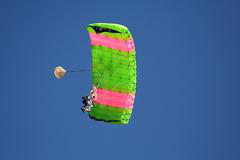

In [48]:
ll.train[0][0]

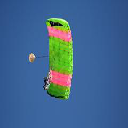

In [49]:
ll.train[0][0].resize((128,128))

In [0]:
#export
class ResizeFixed(Transform):
    _order=10
    def __init__(self,size):
        if isinstance(size,int): size=(size,size)
        self.size = size
        
    def __call__(self, item): return item.resize(self.size, PIL.Image.BILINEAR)

def to_byte_tensor(item):
    res = torch.ByteTensor(torch.ByteStorage.from_buffer(item.tobytes()))
    w,h = item.size
    return res.view(h,w,-1).permute(2,0,1)
to_byte_tensor._order=20

def to_float_tensor(item): return item.float().div_(255.)
to_float_tensor._order=30

In [0]:
tfms = [make_rgb,ResizeFixed(128),to_byte_tensor,to_float_tensor]
il = ImageList.from_files(path, tfms=tfms)
sd = SplitData.split_by_func(il,splitter)
ll = label_by_func(sd,parent_labeler,proc_y=CategoryProcessor())

In [0]:
#export
def show_image(im,figsize=(3,3)):
  plt.figure(figsize=figsize)
  plt.axis('off')
  plt.imshow(im.permute(1,2,0))

In [53]:
x,y = ll.train[0]
x.shape

torch.Size([3, 128, 128])

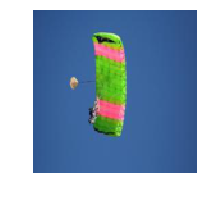

In [54]:
show_image(x)

## Modeling

### DataBunch

In [0]:
bs=64

In [0]:
train_dl,valid_dl = get_dls(ll.train,ll.valid,bs,num_workers=4)

In [0]:
x,y = next(iter(train_dl))

In [58]:
x.shape

torch.Size([64, 3, 128, 128])

'n03417042'

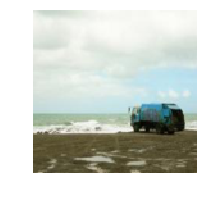

In [59]:
show_image(x[0])
ll.train.proc_y.vocab[y[0]]

In [60]:
y

tensor([2, 7, 1, 9, 2, 1, 9, 8, 9, 7, 8, 1, 8, 0, 6, 1, 6, 2, 2, 7, 5, 5, 6, 7,
        4, 7, 6, 4, 0, 4, 4, 9, 2, 1, 1, 6, 6, 8, 1, 1, 2, 3, 0, 3, 1, 1, 5, 7,
        0, 1, 1, 2, 6, 5, 0, 6, 5, 7, 9, 0, 1, 5, 7, 8])

In [0]:
#export
class DataBunch():
    def __init__(self, train_dl, valid_dl, c_in=None, c_out=None):
        self.train_dl,self.valid_dl,self.c_in,self.c_out = train_dl,valid_dl,c_in,c_out

    @property
    def train_ds(self): return self.train_dl.dataset

    @property
    def valid_ds(self): return self.valid_dl.dataset

In [0]:
#export
def databunchify(sd, bs, c_in=None, c_out=None, **kwargs):
    dls = get_dls(sd.train, sd.valid, bs, **kwargs)
    return DataBunch(*dls, c_in=c_in, c_out=c_out)

SplitData.to_databunch = databunchify

In [0]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE_160)
tfms = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]

il = ImageList.from_files(path, tfms=tfms)
sd = SplitData.split_by_func(il, partial(grandparent_splitter, valid_name='val'))
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor())
data = ll.to_databunch(bs, c_in=3, c_out=10, num_workers=4)

### model

In [0]:
cbfs = [partial(AvgStatsCallback,accuracy), CudaCallback]

In [65]:
m,s = x.mean((0,2,3)).cuda(),x.std((0,2,3))
m,s

(tensor([0.4726, 0.4607, 0.4268], device='cuda:0'),
 tensor([0.2696, 0.2670, 0.2948]))

In [0]:
#export
def normalize_chan(x,mean,std):
  return (x-mean[...,None,None])/std[...,None,None]

_m = tensor([0.4693, 0.4640, 0.4347])
_s = tensor([0.2784, 0.2799, 0.3018])
norm_imagenette = partial(normalize_chan,mean=_m.cuda(),std=_s.cuda())

In [0]:
cbfs.append(partial(BatchTransformXCallback,norm_imagenette))

In [0]:
nfs = [64,64,128,256]

In [0]:
#export
import math
def prev_pow_2(x): return 2**math.floor(math.log2(x))

def get_cnn_layers(data, nfs, layer, **kwargs):
    def f(ni, nf, stride=2): return layer(ni, nf, 3, stride=stride, **kwargs)
    l1 = data.c_in
    l2 = prev_pow_2(l1*3*3)
    layers =  [f(l1  , l2  , stride=1),
               f(l2  , l2*2, stride=2),
               f(l2*2, l2*4, stride=2)]
    nfs = [l2*4] + nfs
    layers += [f(nfs[i], nfs[i+1]) for i in range(len(nfs)-1)]
    layers += [nn.AdaptiveAvgPool2d(1), Lambda(flatten), 
               nn.Linear(nfs[-1], data.c_out)]
    return layers

def get_cnn_model(data, nfs, layer, **kwargs):
    return nn.Sequential(*get_cnn_layers(data, nfs, layer, **kwargs))

def get_learn_run(nfs, data, lr, layer, cbs=None, opt_func=None, **kwargs):
    model = get_cnn_model(data, nfs, layer, **kwargs)
    init_cnn(model)
    return get_runner(model, data, lr=lr, cbs=cbs, opt_func=opt_func)

In [0]:
prev_pow_2??

In [0]:
#export
def cos_1cycle_anneal(start, high, end):
    return [sched_cos(start, high), sched_cos(high, end)]

In [0]:
sched = combine_scheds([0.3,0.7], cos_1cycle_anneal(0.1,0.3,0.05))

In [0]:
learn,run = get_learn_run(nfs,data,0.2,conv_layer,cbs=cbfs+[
    partial(ParamScheduler,'lr',sched)
])

In [74]:
%time run.fit(5,learn)

train: [1.771487858936327, tensor(0.3866, device='cuda:0')]
valid: [1.626665771484375, tensor(0.4420, device='cuda:0')]
train: [1.3369078520048083, tensor(0.5505, device='cuda:0')]
valid: [1.8458643798828125, tensor(0.4060, device='cuda:0')]
train: [1.0319969256534047, tensor(0.6604, device='cuda:0')]
valid: [1.3046187744140625, tensor(0.5780, device='cuda:0')]
train: [0.7701835792083527, tensor(0.7498, device='cuda:0')]
valid: [0.8807886962890625, tensor(0.7180, device='cuda:0')]
train: [0.5672414479966458, tensor(0.8240, device='cuda:0')]
valid: [0.83382373046875, tensor(0.7300, device='cuda:0')]
CPU times: user 17.6 s, sys: 8.04 s, total: 25.7 s
Wall time: 1min 42s


In [0]:
#export
def model_summary(run, learn, data, find_all=False):
    xb,yb = get_batch(data.valid_dl, run)
    device = next(learn.model.parameters()).device#Model may not be on the GPU yet
    xb,yb = xb.to(device),yb.to(device)
    mods = find_modules(learn.model, is_lin_layer) if find_all else learn.model.children()
    f = lambda hook,mod,inp,out: print(f"{mod}\n{out.shape}\n")
    with Hooks(mods, f) as hooks: learn.model(xb)

In [77]:
model_summary(run, learn, data)


Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 16, 128, 128])

Sequential(
  (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 32, 64, 64])

Sequential(
  (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 64, 32, 32])

Sequential(
  (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 64, 16, 16])

Sequential(
  (0): Conv2d(64, 64, kernel_size=(

###export

In [0]:
!python notebook2script.py 08_Data_block.ipnb